In [ ]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.multioutput import RegressorChain
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from tqdm import tqdm

Making Data Set


In [ ]:
adj_mx_la = pd.read_pickle("/content/drive/MyDrive/Traffic Prediction/Dataset/LA/adj_mx.pkl")

In [ ]:
sensor_list_la = adj_mx_la[0]

In [ ]:
train_LA = np.load("/content/drive/MyDrive/Traffic Prediction/Dataset/LA/train.npz")
test_LA = np.load("/content/drive/MyDrive/Traffic Prediction/Dataset/LA/test.npz")
val_LA = np.load("/content/drive/MyDrive/Traffic Prediction/Dataset/LA/val.npz")

How Does our Data Set Look Like?

In [ ]:
print(train_LA["x"].shape, train_LA["y"].shape, train_LA["x_offsets"].shape, train_LA["y_offsets"].shape)
print(test_LA["x"].shape, test_LA["y"].shape, test_LA["x_offsets"].shape, test_LA["y_offsets"].shape)
print(val_LA["x"].shape, val_LA["y"].shape, val_LA["x_offsets"].shape, val_LA["y_offsets"].shape)

(23974, 12, 207, 2) (23974, 12, 207, 2) (12, 1) (12, 1)
(6850, 12, 207, 2) (6850, 12, 207, 2) (12, 1) (12, 1)
(3425, 12, 207, 2) (3425, 12, 207, 2) (12, 1) (12, 1)


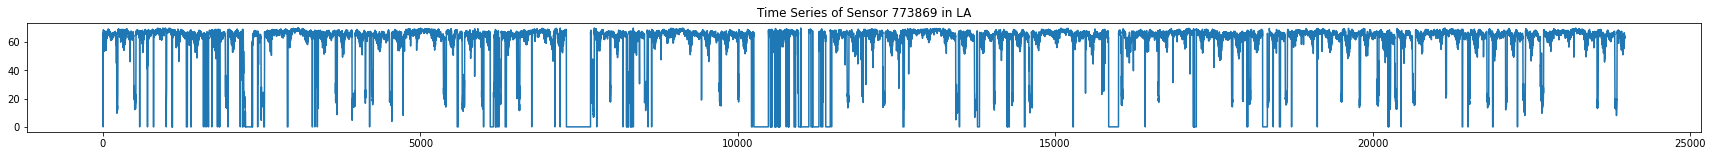

In [ ]:
plt.figure(figsize=(30, 2))
plt.plot(train_LA["x"][:, :, 0, 0][:, 0])
plt.title("Time Series of Sensor " + adj_mx_la[0][0] + " in LA")
plt.show()

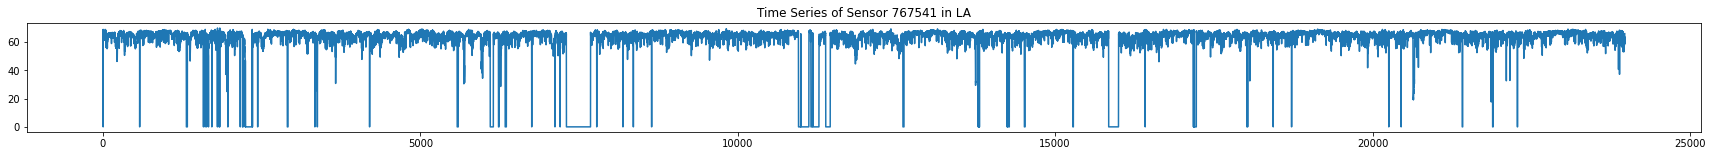

In [ ]:
plt.figure(figsize=(30, 2))
plt.plot(train_LA["x"][:, :, 1, 0][:, 0])
plt.title("Time Series of Sensor " + adj_mx_la[0][1] + " in LA")
plt.show()

In [ ]:
sensor_avg_mae = [[] for i in range(12)]
sensor_avg_rmse = [[] for i in range(12)]
sensor_avg_mape = [[] for i in range(12)]
for i in tqdm(range(len(sensor_list_la))):
    print("Sensor: ", sensor_list_la[i], end=", ")
    train_X = train_LA["x"][:, :, i, 0]
    train_y = train_LA["y"][:, :, i, 0]
    val_X = val_LA["x"][:, :, i, 0]
    val_y = val_LA["y"][:, :, i, 0]
    for comp in range(1, 13):
        # print("Component: ", comp, end=", ")
        regr = make_pipeline(StandardScaler(), PLSRegression(n_components=comp))
        regr = regr.fit(train_X, train_y)
        prediction = regr.predict(val_X)
        mae, rmse, mape = [], [], []
        for pred, gt in zip(prediction, val_y):
            mae.append(mean_absolute_error(pred, gt))
            rmse.append(np.sqrt(mean_squared_error(pred, gt)))
            mape.append(mean_absolute_percentage_error(pred, gt))
        # print("AVG MAE: ", round(sum(mae) / len(mae), 3), end=", ")
        # print("AVG RMSE: ", round(sum(rmse) / len(rmse), 3), end=", ")
        # print("AVG MAPE: ", round(sum(mape) / len(mape), 3))
        sensor_avg_mae[comp - 1].append(sum(mae) / len(mae))
        sensor_avg_rmse[comp - 1].append(sum(rmse) / len(rmse))
        sensor_avg_mape[comp - 1].append(sum(mape) / len(mape))

  0%|          | 0/207 [00:00<?, ?it/s]

Sensor:  773869, 

  0%|          | 1/207 [00:32<1:52:42, 32.83s/it]

Sensor:  767541, 

  1%|          | 2/207 [01:05<1:52:15, 32.85s/it]

Sensor:  767542, 

  1%|▏         | 3/207 [01:38<1:52:14, 33.01s/it]

Sensor:  717447, 

  2%|▏         | 4/207 [02:12<1:52:28, 33.24s/it]

Sensor:  717446, 

  2%|▏         | 5/207 [02:44<1:50:30, 32.82s/it]

Sensor:  717445, 

  3%|▎         | 6/207 [03:17<1:49:54, 32.81s/it]

Sensor:  773062, 

  3%|▎         | 7/207 [03:49<1:49:03, 32.72s/it]

Sensor:  767620, 

  4%|▍         | 8/207 [04:22<1:48:28, 32.71s/it]

Sensor:  737529, 

  4%|▍         | 9/207 [04:55<1:48:05, 32.75s/it]

Sensor:  717816, 

  5%|▍         | 10/207 [05:29<1:48:41, 33.10s/it]

Sensor:  765604, 

  5%|▌         | 11/207 [06:04<1:49:55, 33.65s/it]

Sensor:  767471, 

  6%|▌         | 12/207 [06:36<1:47:50, 33.18s/it]

Sensor:  716339, 

  6%|▋         | 13/207 [07:09<1:47:04, 33.12s/it]

Sensor:  773906, 

  7%|▋         | 14/207 [07:42<1:46:11, 33.01s/it]

Sensor:  765273, 

  7%|▋         | 15/207 [08:15<1:45:42, 33.03s/it]

Sensor:  716331, 

  8%|▊         | 16/207 [08:48<1:45:03, 33.00s/it]

Sensor:  771667, 

  8%|▊         | 17/207 [09:20<1:44:26, 32.98s/it]

Sensor:  716337, 

  9%|▊         | 18/207 [09:53<1:43:40, 32.91s/it]

Sensor:  769953, 

  9%|▉         | 19/207 [10:26<1:42:49, 32.82s/it]

Sensor:  769402, 

 10%|▉         | 20/207 [10:59<1:42:15, 32.81s/it]

Sensor:  769403, 

 10%|█         | 21/207 [11:31<1:41:29, 32.74s/it]

Sensor:  769819, 

 11%|█         | 22/207 [12:05<1:42:05, 33.11s/it]

Sensor:  769405, 

 11%|█         | 23/207 [12:39<1:41:49, 33.20s/it]

Sensor:  716941, 

 12%|█▏        | 24/207 [13:10<1:40:01, 32.80s/it]

Sensor:  717578, 

 12%|█▏        | 25/207 [13:42<1:38:20, 32.42s/it]

Sensor:  716960, 

 13%|█▎        | 26/207 [14:13<1:36:34, 32.01s/it]

Sensor:  717804, 

 13%|█▎        | 27/207 [14:45<1:35:44, 31.91s/it]

Sensor:  767572, 

 14%|█▎        | 28/207 [15:16<1:34:43, 31.75s/it]

Sensor:  767573, 

 14%|█▍        | 29/207 [15:51<1:37:01, 32.71s/it]

Sensor:  773012, 

 14%|█▍        | 30/207 [16:25<1:37:48, 33.15s/it]

Sensor:  773013, 

 15%|█▍        | 31/207 [16:58<1:36:29, 32.89s/it]

Sensor:  764424, 

 15%|█▌        | 32/207 [17:31<1:36:13, 32.99s/it]

Sensor:  769388, 

 16%|█▌        | 33/207 [18:03<1:34:36, 32.62s/it]

Sensor:  716328, 

 16%|█▋        | 34/207 [18:34<1:33:26, 32.41s/it]

Sensor:  717819, 

 17%|█▋        | 35/207 [19:06<1:31:59, 32.09s/it]

Sensor:  769941, 

 17%|█▋        | 36/207 [19:38<1:31:27, 32.09s/it]

Sensor:  760987, 

 18%|█▊        | 37/207 [20:09<1:30:03, 31.79s/it]

Sensor:  718204, 

 18%|█▊        | 38/207 [20:41<1:29:31, 31.79s/it]

Sensor:  718045, 

 19%|█▉        | 39/207 [21:12<1:28:49, 31.73s/it]

Sensor:  769418, 

 19%|█▉        | 40/207 [21:44<1:28:21, 31.75s/it]

Sensor:  768066, 

 20%|█▉        | 41/207 [22:16<1:27:40, 31.69s/it]

Sensor:  772140, 

 20%|██        | 42/207 [22:47<1:27:01, 31.65s/it]

Sensor:  773927, 

 21%|██        | 43/207 [23:20<1:27:10, 31.89s/it]

Sensor:  760024, 

 21%|██▏       | 44/207 [23:51<1:26:24, 31.81s/it]

Sensor:  774012, 

 22%|██▏       | 45/207 [24:24<1:26:31, 32.05s/it]

Sensor:  774011, 

 22%|██▏       | 46/207 [24:55<1:25:17, 31.79s/it]

Sensor:  767609, 

 23%|██▎       | 47/207 [25:27<1:24:32, 31.70s/it]

Sensor:  769359, 

 23%|██▎       | 48/207 [25:59<1:24:53, 32.03s/it]

Sensor:  760650, 

 24%|██▎       | 49/207 [26:32<1:24:59, 32.27s/it]

Sensor:  716956, 

 24%|██▍       | 50/207 [27:04<1:24:01, 32.11s/it]

Sensor:  769831, 

 25%|██▍       | 51/207 [27:36<1:23:16, 32.03s/it]

Sensor:  761604, 

 25%|██▌       | 52/207 [28:07<1:22:16, 31.85s/it]

Sensor:  717495, 

 26%|██▌       | 53/207 [28:39<1:21:57, 31.93s/it]

Sensor:  716554, 

 26%|██▌       | 54/207 [29:11<1:21:14, 31.86s/it]

Sensor:  773953, 

 27%|██▋       | 55/207 [29:42<1:20:21, 31.72s/it]

Sensor:  767470, 

 27%|██▋       | 56/207 [30:14<1:19:47, 31.70s/it]

Sensor:  716955, 

 28%|██▊       | 57/207 [30:46<1:19:20, 31.74s/it]

Sensor:  764949, 

 28%|██▊       | 58/207 [31:17<1:18:25, 31.58s/it]

Sensor:  773954, 

 29%|██▊       | 59/207 [31:49<1:17:45, 31.52s/it]

Sensor:  767366, 

 29%|██▉       | 60/207 [32:21<1:17:37, 31.69s/it]

Sensor:  769444, 

 29%|██▉       | 61/207 [32:52<1:17:05, 31.68s/it]

Sensor:  773939, 

 30%|██▉       | 62/207 [33:24<1:16:44, 31.76s/it]

Sensor:  774067, 

 30%|███       | 63/207 [33:56<1:16:29, 31.87s/it]

Sensor:  769443, 

 31%|███       | 64/207 [34:28<1:15:41, 31.76s/it]

Sensor:  767750, 

 31%|███▏      | 65/207 [34:59<1:15:04, 31.72s/it]

Sensor:  767751, 

 32%|███▏      | 66/207 [35:31<1:14:12, 31.58s/it]

Sensor:  767610, 

 32%|███▏      | 67/207 [36:06<1:16:19, 32.71s/it]

Sensor:  773880, 

 33%|███▎      | 68/207 [36:39<1:16:08, 32.86s/it]

Sensor:  764766, 

 33%|███▎      | 69/207 [37:11<1:14:56, 32.58s/it]

Sensor:  717497, 

 34%|███▍      | 70/207 [37:43<1:13:51, 32.34s/it]

Sensor:  717490, 

 34%|███▍      | 71/207 [38:14<1:12:44, 32.09s/it]

Sensor:  717491, 

 35%|███▍      | 72/207 [38:46<1:11:56, 31.98s/it]

Sensor:  717492, 

 35%|███▌      | 73/207 [39:18<1:11:13, 31.90s/it]

Sensor:  717493, 

 36%|███▌      | 74/207 [39:49<1:10:21, 31.74s/it]

Sensor:  765176, 

 36%|███▌      | 75/207 [40:21<1:09:33, 31.62s/it]

Sensor:  717498, 

 37%|███▋      | 76/207 [40:52<1:08:49, 31.52s/it]

Sensor:  717499, 

 37%|███▋      | 77/207 [41:24<1:08:48, 31.76s/it]

Sensor:  765171, 

 38%|███▊      | 78/207 [41:56<1:08:02, 31.64s/it]

Sensor:  718064, 

 38%|███▊      | 79/207 [42:27<1:07:14, 31.52s/it]

Sensor:  718066, 

 39%|███▊      | 80/207 [42:58<1:06:34, 31.45s/it]

Sensor:  765164, 

 39%|███▉      | 81/207 [43:29<1:05:53, 31.38s/it]

Sensor:  769431, 

 40%|███▉      | 82/207 [44:01<1:05:37, 31.50s/it]

Sensor:  769430, 

 40%|████      | 83/207 [44:33<1:05:15, 31.58s/it]

Sensor:  717610, 

 41%|████      | 84/207 [45:04<1:04:28, 31.45s/it]

Sensor:  767053, 

 41%|████      | 85/207 [45:35<1:03:51, 31.41s/it]

Sensor:  767621, 

 42%|████▏     | 86/207 [46:08<1:04:20, 31.91s/it]

Sensor:  772596, 

 42%|████▏     | 87/207 [46:42<1:04:47, 32.40s/it]

Sensor:  772597, 

 43%|████▎     | 88/207 [47:13<1:03:34, 32.05s/it]

Sensor:  767350, 

 43%|████▎     | 89/207 [47:45<1:02:49, 31.94s/it]

Sensor:  767351, 

 43%|████▎     | 90/207 [48:17<1:02:07, 31.86s/it]

Sensor:  716571, 

 44%|████▍     | 91/207 [48:48<1:01:31, 31.83s/it]

Sensor:  773023, 

 44%|████▍     | 92/207 [49:20<1:00:43, 31.69s/it]

Sensor:  767585, 

 45%|████▍     | 93/207 [49:51<1:00:17, 31.74s/it]

Sensor:  773024, 

 45%|████▌     | 94/207 [50:23<59:27, 31.57s/it]  

Sensor:  717483, 

 46%|████▌     | 95/207 [50:54<58:59, 31.60s/it]

Sensor:  718379, 

 46%|████▋     | 96/207 [51:27<58:46, 31.77s/it]

Sensor:  717481, 

 47%|████▋     | 97/207 [51:58<58:17, 31.80s/it]

Sensor:  717480, 

 47%|████▋     | 98/207 [52:30<57:51, 31.85s/it]

Sensor:  717486, 

 48%|████▊     | 99/207 [53:02<57:24, 31.89s/it]

Sensor:  764120, 

 48%|████▊     | 100/207 [53:34<56:50, 31.88s/it]

Sensor:  772151, 

 49%|████▉     | 101/207 [54:06<56:28, 31.96s/it]

Sensor:  718371, 

 49%|████▉     | 102/207 [54:38<55:37, 31.79s/it]

Sensor:  717489, 

 50%|████▉     | 103/207 [55:10<55:33, 32.06s/it]

Sensor:  717488, 

 50%|█████     | 104/207 [55:42<54:36, 31.81s/it]

Sensor:  717818, 

 51%|█████     | 105/207 [56:14<54:17, 31.93s/it]

Sensor:  718076, 

 51%|█████     | 106/207 [56:50<55:42, 33.09s/it]

Sensor:  718072, 

 52%|█████▏    | 107/207 [57:22<54:39, 32.80s/it]

Sensor:  767455, 

 52%|█████▏    | 108/207 [57:53<53:24, 32.37s/it]

Sensor:  767454, 

 53%|█████▎    | 109/207 [58:25<52:40, 32.25s/it]

Sensor:  761599, 

 53%|█████▎    | 110/207 [58:56<51:32, 31.88s/it]

Sensor:  717099, 

 54%|█████▎    | 111/207 [59:28<51:04, 31.92s/it]

Sensor:  773916, 

 54%|█████▍    | 112/207 [1:00:00<50:26, 31.86s/it]

Sensor:  716968, 

 55%|█████▍    | 113/207 [1:00:32<50:09, 32.02s/it]

Sensor:  769467, 

 55%|█████▌    | 114/207 [1:01:04<49:40, 32.05s/it]

Sensor:  717576, 

 56%|█████▌    | 115/207 [1:01:37<49:26, 32.25s/it]

Sensor:  717573, 

 56%|█████▌    | 116/207 [1:02:08<48:28, 31.96s/it]

Sensor:  717572, 

 57%|█████▋    | 117/207 [1:02:40<47:58, 31.99s/it]

Sensor:  717571, 

 57%|█████▋    | 118/207 [1:03:13<47:39, 32.12s/it]

Sensor:  717570, 

 57%|█████▋    | 119/207 [1:03:45<46:59, 32.04s/it]

Sensor:  764760, 

 58%|█████▊    | 120/207 [1:04:17<46:32, 32.10s/it]

Sensor:  718089, 

 58%|█████▊    | 121/207 [1:04:49<45:50, 31.98s/it]

Sensor:  769847, 

 59%|█████▉    | 122/207 [1:05:21<45:40, 32.24s/it]

Sensor:  717608, 

 59%|█████▉    | 123/207 [1:05:53<45:00, 32.15s/it]

Sensor:  767523, 

 60%|█████▉    | 124/207 [1:06:27<45:02, 32.56s/it]

Sensor:  716942, 

 60%|██████    | 125/207 [1:07:03<45:48, 33.52s/it]

Sensor:  718090, 

 61%|██████    | 126/207 [1:07:34<44:26, 32.93s/it]

Sensor:  769867, 

 61%|██████▏   | 127/207 [1:08:06<43:25, 32.57s/it]

Sensor:  717472, 

 62%|██████▏   | 128/207 [1:08:38<42:29, 32.28s/it]

Sensor:  717473, 

 62%|██████▏   | 129/207 [1:09:09<41:45, 32.12s/it]

Sensor:  759591, 

 63%|██████▎   | 130/207 [1:09:41<40:57, 31.92s/it]

Sensor:  764781, 

 63%|██████▎   | 131/207 [1:10:13<40:22, 31.88s/it]

Sensor:  765099, 

 64%|██████▍   | 132/207 [1:10:45<39:52, 31.90s/it]

Sensor:  762329, 

 64%|██████▍   | 133/207 [1:11:16<39:13, 31.80s/it]

Sensor:  716953, 

 65%|██████▍   | 134/207 [1:11:48<38:34, 31.70s/it]

Sensor:  716951, 

 65%|██████▌   | 135/207 [1:12:19<37:58, 31.65s/it]

Sensor:  767509, 

 66%|██████▌   | 136/207 [1:12:50<37:11, 31.43s/it]

Sensor:  765182, 

 66%|██████▌   | 137/207 [1:13:22<37:00, 31.72s/it]

Sensor:  769358, 

 67%|██████▋   | 138/207 [1:13:54<36:30, 31.74s/it]

Sensor:  772513, 

 67%|██████▋   | 139/207 [1:14:26<35:56, 31.71s/it]

Sensor:  716958, 

 68%|██████▊   | 140/207 [1:14:57<35:17, 31.61s/it]

Sensor:  718496, 

 68%|██████▊   | 141/207 [1:15:29<34:51, 31.69s/it]

Sensor:  769346, 

 69%|██████▊   | 142/207 [1:16:00<34:08, 31.51s/it]

Sensor:  773904, 

 69%|██████▉   | 143/207 [1:16:32<33:42, 31.60s/it]

Sensor:  718499, 

 70%|██████▉   | 144/207 [1:17:08<34:26, 32.80s/it]

Sensor:  764853, 

 70%|███████   | 145/207 [1:17:40<33:55, 32.83s/it]

Sensor:  761003, 

 71%|███████   | 146/207 [1:18:12<33:02, 32.51s/it]

Sensor:  717502, 

 71%|███████   | 147/207 [1:18:43<32:07, 32.13s/it]

Sensor:  759602, 

 71%|███████▏  | 148/207 [1:19:15<31:27, 31.98s/it]

Sensor:  717504, 

 72%|███████▏  | 149/207 [1:19:46<30:44, 31.80s/it]

Sensor:  763995, 

 72%|███████▏  | 150/207 [1:20:18<30:01, 31.60s/it]

Sensor:  717508, 

 73%|███████▎  | 151/207 [1:20:49<29:23, 31.49s/it]

Sensor:  765265, 

 73%|███████▎  | 152/207 [1:21:20<28:46, 31.40s/it]

Sensor:  773996, 

 74%|███████▍  | 153/207 [1:21:51<28:15, 31.39s/it]

Sensor:  773995, 

 74%|███████▍  | 154/207 [1:22:23<27:42, 31.36s/it]

Sensor:  717469, 

 75%|███████▍  | 155/207 [1:22:54<27:12, 31.40s/it]

Sensor:  717468, 

 75%|███████▌  | 156/207 [1:23:26<26:40, 31.38s/it]

Sensor:  764106, 

 76%|███████▌  | 157/207 [1:23:57<26:07, 31.35s/it]

Sensor:  717465, 

 76%|███████▋  | 158/207 [1:24:28<25:34, 31.32s/it]

Sensor:  764794, 

 77%|███████▋  | 159/207 [1:25:00<25:08, 31.43s/it]

Sensor:  717466, 

 77%|███████▋  | 160/207 [1:25:31<24:35, 31.40s/it]

Sensor:  717461, 

 78%|███████▊  | 161/207 [1:26:02<24:03, 31.38s/it]

Sensor:  717460, 

 78%|███████▊  | 162/207 [1:26:34<23:30, 31.33s/it]

Sensor:  717463, 

 79%|███████▊  | 163/207 [1:27:09<23:49, 32.48s/it]

Sensor:  717462, 

 79%|███████▉  | 164/207 [1:27:42<23:28, 32.76s/it]

Sensor:  769345, 

 80%|███████▉  | 165/207 [1:28:14<22:44, 32.49s/it]

Sensor:  716943, 

 80%|████████  | 166/207 [1:28:46<22:01, 32.23s/it]

Sensor:  772669, 

 81%|████████  | 167/207 [1:29:17<21:18, 31.96s/it]

Sensor:  717582, 

 81%|████████  | 168/207 [1:29:49<20:44, 31.92s/it]

Sensor:  717583, 

 82%|████████▏ | 169/207 [1:30:21<20:11, 31.89s/it]

Sensor:  717580, 

 82%|████████▏ | 170/207 [1:30:52<19:38, 31.85s/it]

Sensor:  716949, 

 83%|████████▎ | 171/207 [1:31:24<19:06, 31.85s/it]

Sensor:  717587, 

 83%|████████▎ | 172/207 [1:31:56<18:31, 31.75s/it]

Sensor:  772178, 

 84%|████████▎ | 173/207 [1:32:27<17:57, 31.70s/it]

Sensor:  717585, 

 84%|████████▍ | 174/207 [1:32:59<17:27, 31.75s/it]

Sensor:  716939, 

 85%|████████▍ | 175/207 [1:33:32<17:04, 32.02s/it]

Sensor:  768469, 

 85%|████████▌ | 176/207 [1:34:03<16:28, 31.90s/it]

Sensor:  764101, 

 86%|████████▌ | 177/207 [1:34:35<15:51, 31.72s/it]

Sensor:  767554, 

 86%|████████▌ | 178/207 [1:35:06<15:18, 31.67s/it]

Sensor:  773975, 

 86%|████████▋ | 179/207 [1:35:38<14:44, 31.60s/it]

Sensor:  773974, 

 87%|████████▋ | 180/207 [1:36:09<14:10, 31.51s/it]

Sensor:  717510, 

 87%|████████▋ | 181/207 [1:36:40<13:37, 31.44s/it]

Sensor:  717513, 

 88%|████████▊ | 182/207 [1:37:15<13:31, 32.47s/it]

Sensor:  717825, 

 88%|████████▊ | 183/207 [1:37:50<13:18, 33.29s/it]

Sensor:  767495, 

 89%|████████▉ | 184/207 [1:38:22<12:36, 32.90s/it]

Sensor:  767494, 

 89%|████████▉ | 185/207 [1:38:54<11:58, 32.65s/it]

Sensor:  717821, 

 90%|████████▉ | 186/207 [1:39:26<11:20, 32.42s/it]

Sensor:  717823, 

 90%|█████████ | 187/207 [1:39:58<10:44, 32.21s/it]

Sensor:  717458, 

 91%|█████████ | 188/207 [1:40:30<10:08, 32.01s/it]

Sensor:  717459, 

 91%|█████████▏| 189/207 [1:41:01<09:32, 31.83s/it]

Sensor:  769926, 

 92%|█████████▏| 190/207 [1:41:33<09:00, 31.77s/it]

Sensor:  764858, 

 92%|█████████▏| 191/207 [1:42:04<08:26, 31.67s/it]

Sensor:  717450, 

 93%|█████████▎| 192/207 [1:42:36<07:55, 31.71s/it]

Sensor:  717452, 

 93%|█████████▎| 193/207 [1:43:07<07:23, 31.64s/it]

Sensor:  717453, 

 94%|█████████▎| 194/207 [1:43:39<06:50, 31.59s/it]

Sensor:  759772, 

 94%|█████████▍| 195/207 [1:44:10<06:17, 31.45s/it]

Sensor:  717456, 

 95%|█████████▍| 196/207 [1:44:41<05:45, 31.37s/it]

Sensor:  771673, 

 95%|█████████▌| 197/207 [1:45:13<05:14, 31.43s/it]

Sensor:  772167, 

 96%|█████████▌| 198/207 [1:45:44<04:43, 31.48s/it]

Sensor:  769372, 

 96%|█████████▌| 199/207 [1:46:16<04:12, 31.59s/it]

Sensor:  774204, 

 97%|█████████▋| 200/207 [1:46:48<03:41, 31.65s/it]

Sensor:  769806, 

 97%|█████████▋| 201/207 [1:47:19<03:09, 31.57s/it]

Sensor:  717590, 

 98%|█████████▊| 202/207 [1:47:51<02:38, 31.68s/it]

Sensor:  717592, 

 98%|█████████▊| 203/207 [1:48:24<02:07, 31.85s/it]

Sensor:  717595, 

 99%|█████████▊| 204/207 [1:48:55<01:34, 31.60s/it]

Sensor:  772168, 

 99%|█████████▉| 205/207 [1:49:26<01:03, 31.66s/it]

Sensor:  718141, 

100%|█████████▉| 206/207 [1:49:58<00:31, 31.53s/it]

Sensor:  769373, 

100%|██████████| 207/207 [1:50:29<00:00, 32.03s/it]


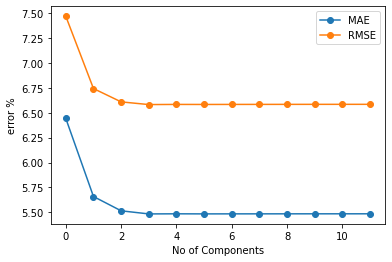

In [ ]:
plt.plot(np.mean(np.array(sensor_avg_mae), axis=1), "o-", label="MAE")
plt.plot(np.mean(np.array(sensor_avg_rmse), axis=1), "o-", label="RMSE")
plt.xlabel('No of Components')
plt.ylabel('error %')
plt.legend()
plt.show()

In [ ]:
import pickle

with open('/content/drive/MyDrive/Traffic Prediction/Results/PLSRErrorData.pkl', 'wb') as f:
  pickle.dump([sensor_avg_mae, sensor_avg_mape, sensor_avg_rmse], f)

In [ ]:
ErrorData = pd.read_pickle("/content/drive/MyDrive/Traffic Prediction/Results/PLSRErrorData.pkl")

In [ ]:
print(len(ErrorData))

sensor_avg_mae = ErrorData[0]
sensor_avg_rmse = ErrorData[2]

3
